Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 8.1 : Saving Models** |
**Name**: | Niemo, Christian Al C.
**Section**: | CPE32S9
**Date Performed**: | 04-18-24
**Date Submitted**: | 04-19-24
**Instructor**: | Engr. Roman Richard
<hr> | <hr>

**Explain your datasets and the problem being addressed.**

The heart disease dataset is a valuable resource for predicting the occurrence of heart disease. It encompasses various features and attributes that provide insights into an individual's health status and potential risk factors associated with heart disease. These features includes Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak and ST_Slope. By analyzing this dataset and applying machine learning algorithms, it becomes possible to develop predictive models that can accurately classify individuals as either having or not having heart disease based on their respective feature values.

In [ ]:
#importing the drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the libraries/packages
from keras.models import Sequential, model_from_json
from keras.layers import Dense
import numpy as np
import pandas as pd
import os

In [ ]:
#reading the csv file
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#changing the string values into numerical values using lambda
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda toLabel:0 if toLabel == 'N' else 1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [ ]:
#changing the string values into categorical types
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['ChestPainType'] = df['ChestPainType'].cat.codes

df['RestingECG'] = df['RestingECG'].astype('category')
df['RestingECG'] = df['RestingECG'].cat.codes

df['ST_Slope'] = df['ST_Slope'].astype('category')
df['ST_Slope'] = df['ST_Slope'].cat.codes

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
#splitting the datasets into X and Y.
#X = input
#Y = output/target values
dataset = df.values

X = dataset[:,0:11]
Y = dataset[:,11]

**Save a model in HDF5 format**

**Save a model and load the model in a JSON format**

In [ ]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Colab Notebooks/model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 86.17%
Saved model to disk
Loaded model from disk
accuracy: 86.17%


In this section, I began by constructing a neural network model with three layers using the Sequential class. The initial layer consisted of 14 neurons with a ReLU activation function, while the input shape was set to 11. The middle layer contained 7 neurons with a ReLU activation function, and the final layer utilized a sigmoid activation function. Subsequently, I compiled the model with the Adam optimizer. The model was then trained for 150 epochs, with a batch size of 10, and its performance was assessed using the evaluate() function. Once the model creation and evaluation were complete, I serialized the model into the JSON format and saved the weights in the HDF5 format. Later on, I loaded the JSON model and performed another evaluation. Interestingly, I observed that the evaluation accuracy remained the same as it was previously.

In [ ]:
#displaying the JSON file in JSON format
import json

# Specify the file path
file_path = '/content/model.json'

# Read the JSON file
with open(file_path) as json_file:
    data = json.load(json_file)

formatted_json = json.dumps(data, indent=4)
print(formatted_json)

{
    "class_name": "Sequential",
    "config": {
        "name": "sequential_3",
        "layers": [
            {
                "module": "keras.layers",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        11
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "ragged": false,
                    "name": "dense_9_input"
                },
                "registered_name": null
            },
            {
                "module": "keras.layers",
                "class_name": "Dense",
                "config": {
                    "name": "dense_9",
                    "trainable": true,
                    "dtype": "float32",
                    "batch_input_shape": [
                        null,
                        11
                    ],
                    "units": 14,
                  

**Save a model and load the model in a YAML format**

In [ ]:
from keras.models import Sequential, model_from_yaml

# create model
model = Sequential()
model.add(Dense(14, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Colab Notebooks/model_yaml.h5")
print("Saved model to disk")

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/model_yaml.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 86.17%
Saved model to disk
Loaded model from disk
accuracy: 86.17%


In this particular section, the model used is identical to the one mentioned earlier. However, instead of serializing it to JSON, this time it was serialized to YAML format. Additionally, the weights were saved in the HDF5 format as before. Subsequently, the YAML model was loaded, and another evaluation was conducted. Additionally, despite running the evaluation separately, it was observed that the accuracy remained unchanged from the previous evaluation.

In [ ]:
#displaying the YAML file in YAML format
import yaml

# Specify the file path
file_path = '/content/model.yaml'

# Read the YAML file
with open(file_path, 'r') as yaml_file:
    data = yaml.safe_load(yaml_file)

# Convert the dictionary to YAML-like format
output = yaml.dump(data)

# Print the formatted output
print(output)

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: InputLayer
    config:
      batch_input_shape:
      - null
      - 11
      dtype: float32
      name: dense_27_input
      ragged: false
      sparse: false
    module: keras.layers
    registered_name: null
  - build_config:
      input_shape:
      - null
      - 11
    class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape:
      - null
      - 11
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
        module: keras.initializers
        registered_name: null
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config:
          seed: null
        module: keras.initializers
        registered_name: null
      kernel_regularizer: null
      name: dense_27
      trainable: true
      units: 14
      use_bias: tr

**Checkpoint Neural Network Model Improvements**

In [ ]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.74587, saving model to weights-improvement-01-0.75.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.74587 to 0.78878, saving model to weights-improvement-02-0.79.hdf5

Epoch 3: val_accuracy did not improve from 0.78878

Epoch 4: val_accuracy did not improve from 0.78878

Epoch 5: val_accuracy did not improve from 0.78878

Epoch 6: val_accuracy did not improve from 0.78878

Epoch 7: val_accuracy improved from 0.78878 to 0.79208, saving model to weights-improvement-07-0.79.hdf5

Epoch 8: val_accuracy did not improve from 0.79208

Epoch 9: val_accuracy did not improve from 0.79208

Epoch 10: val_accuracy did not improve from 0.79208

Epoch 11: val_accuracy did not improve from 0.79208

Epoch 12: val_accuracy did not improve from 0.79208

Epoch 13: val_accuracy did not improve from 0.79208

Epoch 14: val_accuracy did not improve from 0.79208

Epoch 15: val_accuracy did not improve from 0.79208

Epoch 16: val_accuracy did not improve from 0.79208

Epoch 17: val_accuracy did not improve from 0.79208

Epoch 18: val_accuracy did not improve from 0.79208

The result shows the development for every epoch and gives a synopsis of the training procedure. It shows if the model has improved from the previous epoch and contains the validation accuracy that was attained for every run. The model weights are saved to a file using a specific filepath pattern if the validation accuracy of the model improves.

**Checkpoint Best Neural Network Model only**

In [ ]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.74917, saving model to weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.74917

Epoch 3: val_accuracy improved from 0.74917 to 0.77228, saving model to weights.best.hdf5

Epoch 4: val_accuracy did not improve from 0.77228

Epoch 5: val_accuracy did not improve from 0.77228

Epoch 6: val_accuracy did not improve from 0.77228

Epoch 7: val_accuracy did not improve from 0.77228

Epoch 8: val_accuracy did not improve from 0.77228

Epoch 9: val_accuracy did not improve from 0.77228

Epoch 10: val_accuracy did not improve from 0.77228

Epoch 11: val_accuracy improved from 0.77228 to 0.78218, saving model to weights.best.hdf5

Epoch 12: val_accuracy did not improve from 0.78218

Epoch 13: val_accuracy did not improve from 0.78218

Epoch 14: val_accuracy did not improve from 0.78218

Epoch 15: val_accuracy did not improve from 0.78218

Epoch 16: val_accuracy did not improve from 0.78218

Epoch 17: val_accuracy did not improve from 0.

The output provides information about the progress of the training process, including the achieved validation accuracy and whether the model improved compared to the previous epoch. If there is an improvement, the model weights are saved to a fixed file named "weights.best.hdf5".

**Load a saved Neural Network model**

In [ ]:
# load pima indians dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')

#changing the string values into numerical values using lambda
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda toLabel:0 if toLabel == 'N' else 1)

#changing the string values into categorical types
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['ChestPainType'] = df['ChestPainType'].cat.codes

df['RestingECG'] = df['RestingECG'].astype('category')
df['RestingECG'] = df['RestingECG'].cat.codes

df['ST_Slope'] = df['ST_Slope'].astype('category')
df['ST_Slope'] = df['ST_Slope'].cat.codes

dataset = df.values

X = dataset[:,0:11]
Y = dataset[:,11]

# create model
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(7, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))

# load weights
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")


# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 86.82%


The code loads a pre-trained model with weights from a weights.best.hdf5 file and evaluates its accuracy on a dataset. The output confirms the successful loading of the weights and provides the accuracy achieved by the model on the dataset.

**Visualize Model Training History in Keras**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


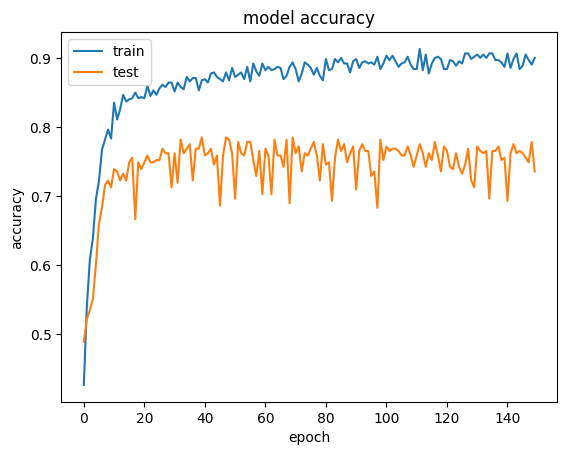

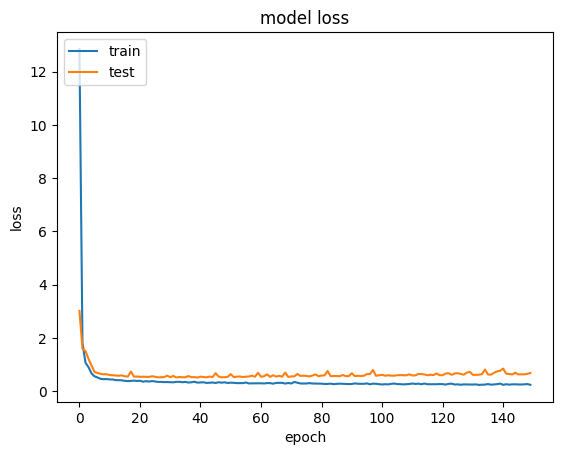

In [ ]:
# load pima indians dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')

#changing the string values into numerical values using lambda
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda toLabel:0 if toLabel == 'N' else 1)

#changing the string values into categorical types
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['ChestPainType'] = df['ChestPainType'].cat.codes

df['RestingECG'] = df['RestingECG'].astype('category')
df['RestingECG'] = df['RestingECG'].cat.codes

df['ST_Slope'] = df['ST_Slope'].astype('category')
df['ST_Slope'] = df['ST_Slope'].cat.codes

dataset = df.values

X = dataset[:,0:11]
Y = dataset[:,11]

# create model
model = Sequential()
model.add(Dense(14, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Based on the output, it shows the performance of a machine learning model over time. The graph consists of two lines, one blue and one orange. The blue line represents the model's performance on the training data, while the orange line indicates the model accuracy.

My interpretation on the output is the training and testing accuracy has a huge gap. The model may benefit from further training. Additionally, it is notable that the model has not over-learned the training dataset, as per on the output.


In [ ]:
#installing the scikeras
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


**Show the application of Dropout Regularization**

In [ ]:
# Baseline Model for Heart Disease dataset
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')

#changing the string values into numerical values using lambda
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda toLabel:0 if toLabel == 'N' else 1)
df.head()

#changing the string values into categorical types
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['ChestPainType'] = df['ChestPainType'].cat.codes

df['RestingECG'] = df['RestingECG'].astype('category')
df['RestingECG'] = df['RestingECG'].cat.codes

df['ST_Slope'] = df['ST_Slope'].astype('category')
df['ST_Slope'] = df['ST_Slope'].cat.codes

dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(14, input_shape=(11,), activation='relu'))
	model.add(Dense(7,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Baseline: 81.27% (3.20%)


Based on the evaluation results, the baseline model for predicting heart disease using the given features achieves an average accuracy of 81.27% across the 10-fold cross-validation. This indicates that the model is able to correctly predict the presence or absence of heart disease for a significant portion of the samples in the dataset.

It's also important to consider the standard deviation of 3.20%, which suggests that the accuracy of the model may vary by approximately 3.20% across different folds. This variability implies that the model's performance could be influenced by the specific data samples used in each fold.

**Show the application of Dropout on the visible layer**

In [ ]:
# Example of Dropout on the Heart Disease dataset: Visible Layer
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')

#changing the string values into numerical values using lambda
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda toLabel:0 if toLabel == 'N' else 1)
df.head()

#changing the string values into categorical types
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['ChestPainType'] = df['ChestPainType'].cat.codes

df['RestingECG'] = df['RestingECG'].astype('category')
df['RestingECG'] = df['RestingECG'].cat.codes

df['ST_Slope'] = df['ST_Slope'].astype('category')
df['ST_Slope'] = df['ST_Slope'].cat.codes

dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(11,)))
	model.add(Dense(14, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(7, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Visible: 85.96% (4.00%)


The create_model function defines the neural network model architecture. It consists of a dropout layer with a dropout rate of 0.2 in the visible layer, followed by two dense layers with ReLU activation and kernel constraints. The output layer uses a sigmoid activation function. The code then creates a pipeline that includes data standardization using StandardScaler and the KerasClassifier wrapper for the baseline model. The model is evaluated using stratified k-fold cross-validation with 10 folds. The results, showing the mean accuracy of 85.96% and a standard deviation of 4.00%, are printed.

**Show the application of Dropout on the hidden layer**

In [ ]:
# load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')

#changing the string values into numerical values using lambda
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda toLabel:0 if toLabel == 'N' else 1)
df.head()

#changing the string values into categorical types
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['ChestPainType'] = df['ChestPainType'].cat.codes

df['RestingECG'] = df['RestingECG'].astype('category')
df['RestingECG'] = df['RestingECG'].cat.codes

df['ST_Slope'] = df['ST_Slope'].astype('category')
df['ST_Slope'] = df['ST_Slope'].cat.codes

dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(14, input_shape=(11,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(7, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Hidden: 85.84% (2.74%)


In the code provided, dropout is applied to the hidden layers of the model. Two dropout layers are added after the first and second hidden layers, respectively. The dropout rate is set to 20% for both layers. By using dropout in the hidden layers, the model becomes less sensitive to individual neuron weights, leading to more robust and generalized representations. The output "Hidden: 85.84% (2.74%)" refers to the average accuracy and standard deviation achieved during the cross-validation process for the dropout of hidden layers.

**Show the application of a time-based learning rate schedule**

In [ ]:
# load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')

#changing the string values into numerical values using lambda
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda toLabel:0 if toLabel == 'N' else 1)
df.head()

#changing the string values into categorical types
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['ChestPainType'] = df['ChestPainType'].cat.codes

df['RestingECG'] = df['RestingECG'].astype('category')
df['RestingECG'] = df['RestingECG'].cat.codes

df['ST_Slope'] = df['ST_Slope'].astype('category')
df['ST_Slope'] = df['ST_Slope'].cat.codes

dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(14, input_shape=(11,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Fit the model with standardized data
model.fit(X_standardized, encoded_Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


22/22 - 2s - 71ms/step - accuracy: 0.7057 - loss: 0.5642 - val_accuracy: 0.7360 - val_loss: 0.5422
Epoch 2/50
22/22 - 0s - 18ms/step - accuracy: 0.8927 - loss: 0.2898 - val_accuracy: 0.7327 - val_loss: 0.6496
Epoch 3/50
22/22 - 0s - 6ms/step - accuracy: 0.9057 - loss: 0.2473 - val_accuracy: 0.7195 - val_loss: 0.6404
Epoch 4/50
22/22 - 0s - 4ms/step - accuracy: 0.9154 - loss: 0.2347 - val_accuracy: 0.7195 - val_loss: 0.6596
Epoch 5/50
22/22 - 0s - 6ms/step - accuracy: 0.9203 - loss: 0.2086 - val_accuracy: 0.7228 - val_loss: 0.7612
Epoch 6/50
22/22 - 0s - 6ms/step - accuracy: 0.9236 - loss: 0.2006 - val_accuracy: 0.7195 - val_loss: 0.7215
Epoch 7/50
22/22 - 0s - 6ms/step - accuracy: 0.9252 - loss: 0.1925 - val_accuracy: 0.7162 - val_loss: 0.7627
Epoch 8/50
22/22 - 0s - 7ms/step - accuracy: 0.9268 - loss: 0.1856 - val_accuracy: 0.7261 - val_loss: 0.8090
Epoch 9/50
22/22 - 0s - 6ms/step - accuracy: 0.9301 - loss: 0.1733 - val_accuracy: 0.7129 - val_loss: 0.8292
Epoch 10/50
22/22 - 0s - 4ms

The training progress shows the loss and accuracy values for each epoch. For example, in the first epoch, the training accuracy is 0.7057, the training loss is 0.5642, the validation accuracy is 0.7360, and the validation loss is 0.5422. The model continues to train for the specified number of epochs, and the accuracy and loss values are updated accordingly.

In [ ]:
import math
from keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')

#changing the string values into numerical values using lambda
df["Sex"] = df["Sex"].apply(lambda toLabel:0 if toLabel == 'M' else 1)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda toLabel:0 if toLabel == 'N' else 1)
df.head()

#changing the string values into categorical types
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['ChestPainType'] = df['ChestPainType'].cat.codes

df['RestingECG'] = df['RestingECG'].astype('category')
df['RestingECG'] = df['RestingECG'].cat.codes

df['ST_Slope'] = df['ST_Slope'].astype('category')
df['ST_Slope'] = df['ST_Slope'].cat.codes

dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(14, input_shape=(11,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Fit the model
model.fit(X_standardized, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 - 1s - 55ms/step - accuracy: 0.6797 - loss: 0.5940 - val_accuracy: 0.7789 - val_loss: 0.5800 - learning_rate: 0.1000
Epoch 2/50
22/22 - 0s - 6ms/step - accuracy: 0.8992 - loss: 0.3026 - val_accuracy: 0.7327 - val_loss: 0.8615 - learning_rate: 0.1000
Epoch 3/50
22/22 - 0s - 6ms/step - accuracy: 0.9089 - loss: 0.2528 - val_accuracy: 0.7624 - val_loss: 0.8396 - learning_rate: 0.1000
Epoch 4/50
22/22 - 0s - 6ms/step - accuracy: 0.9236 - loss: 0.2285 - val_accuracy: 0.7261 - val_loss: 0.7453 - learning_rate: 0.1000
Epoch 5/50
22/22 - 0s - 4ms/step - accuracy: 0.9236 - loss: 0.2229 - val_accuracy: 0.6997 - val_loss: 0.7425 - learning_rate: 0.1000
Epoch 6/50
22/22 - 0s - 4ms/step - accuracy: 0.9252 - loss: 0.2270 - val_accuracy: 0.7525 - val_loss: 0.8296 - learning_rate: 0.1000
Epoch 7/50
22/22 - 0s - 4ms/step - accuracy: 0.9285 - loss: 0.2087 - val_accuracy: 0.7525 - val_loss: 0.8702 - learning_rate: 0.1000
Epoch 8/50
22/22 - 0s - 7ms/step - accuracy: 0.9285 - loss: 0.1993 - val_accura

The training progress shows the loss, accuracy, and learning rate values for each epoch. The model continues to train for the specified number of epochs, and the accuracy and loss values are updated accordingly. The learning rate is adjusted based on the learning rate schedule defined in the code.

**Conclusion**

irst, models can be saved in different formats. HDF5 format allows models to be saved using the save() method, while JSON and YAML formats are supported through the to_json() and to_yaml() methods, respectively. Loading models from these formats is also possible using the model_from_json() and model_from_yaml() functions. Additionally, models can be checkpointed during training by utilizing the ModelCheckpoint callback, which saves model weights based on specific conditions, such as improvements in validation loss. By setting save_best_only=True, only the weights of the best-performing model can be saved. Saved models can be loaded using the load_model() function. Model training history can be visualized by plotting the metrics stored in the history object returned by the fit() method. Dropout regularization can be applied by adding Dropout layers to the model, which randomly deactivate neurons during training. Dropout can be used on both visible and hidden layers by appropriately placing the Dropout layers in the model architecture. Furthermore, learning rate schedules can be implemented. A time-based schedule adjusts the learning rate based on the current epoch number or training time, while a drop-based schedule reduces the learning rate at specific epochs or after a certain number of training steps.

Also, to make the learning rate schedule works, I standardized the encoded values first, because I noticed that when I didn't try to standardized first, the accuracy is in stable 0.6000 which is not good, because it only indicates that the machine isn't learning properly.